In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import ARutils
%matplotlib inline

In [63]:
store_data = pd.read_csv('marketbasket.csv')

In [64]:
store_data.head()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


In [65]:
store_data.describe()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
freq,946,637,720,851,558,958,721,766,643,619,536,510,678,543


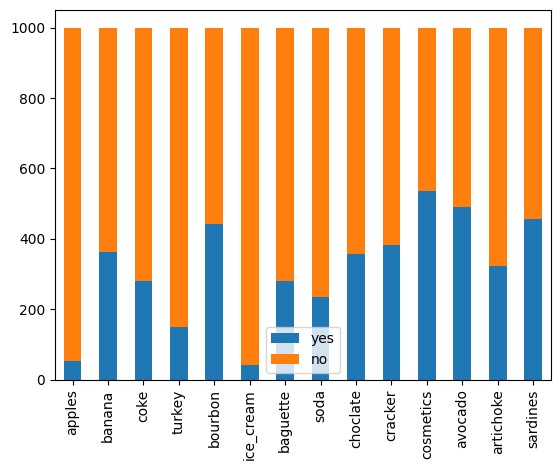

In [66]:
#plot and explore the dataset

yes = (store_data=='Yes').sum()
no = (store_data=='No').sum()
purchased = pd.concat([yes,no], axis=1, keys=['yes','no'])
ax = purchased.plot.bar(stacked=True)
plt.show()

In [67]:
"""
A small sample for Apiori Algorithm in Python
"""
# Creating Sample Transactions
transactions = [
    ['Milk','Bread','Saffron'],
    ['Milk', 'Saffron'],
    ['Bread','Saffron','Wafer'],
    ['Bread', 'Wafer']
]
transactions

[['Milk', 'Bread', 'Saffron'],
 ['Milk', 'Saffron'],
 ['Bread', 'Saffron', 'Wafer'],
 ['Bread', 'Wafer']]

In [68]:
# Generating association rules
Rules = list(apriori(transactions, min_spport=0.2, min_confidence=0.5))

In [69]:
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS','RHS','Support','Confidence','Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[Bread],0.75,0.750000,1.000000
1,[],[Milk],0.50,0.500000,1.000000
2,[],[Saffron],0.75,0.750000,1.000000
3,[],[Wafer],0.50,0.500000,1.000000
4,[Milk],[Bread],0.25,0.500000,0.666667
5,[],"[Bread, Saffron]",0.50,0.500000,1.000000
6,[Bread],[Saffron],0.50,0.666667,0.888889
7,[Saffron],[Bread],0.50,0.666667,0.888889
8,[],"[Wafer, Bread]",0.50,0.500000,1.000000
9,[Bread],[Wafer],0.50,0.666667,1.333333


In [70]:
ARutils.inspect(associationRules)

The number of associated rules: 23
LHS: [] --> RHS:['Bread'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Milk'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Wafer'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Milk'] --> RHS:['Bread'], support: 0.25, confidence: 0.50, lift: 0.67
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Bread', 'Saffron'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Bread'] --> RHS:['Saffron'],

In [71]:
# Pre process the main dataset
transactions = ARutils.data_prepare(store_data)

In [72]:
Rules = list(apriori(transactions,min_support=0.02,  min_confidence=0.2))
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS', 'RHS','Support','Confidence','Lift'])
len(rules_df)

27348

In [73]:
rules_df.nlargest(10,'Lift')

,LHS,RHS,Support,Confidence,Lift
26986,"[baguette, coke, choclate, bourbon]","[cracker, turkey, soda, banana]",0.022,0.400000,16.666667
27024,"[cracker, turkey, soda, banana]","[baguette, coke, choclate, bourbon]",0.022,0.916667,16.666667
26990,"[baguette, cracker, coke, bourbon]","[turkey, choclate, soda, banana]",0.022,0.423077,16.272189
27020,"[turkey, choclate, soda, banana]","[baguette, cracker, coke, bourbon]",0.022,0.846154,16.272189
27212,"[sardines, baguette, cracker, coke]","[turkey, choclate, bourbon, soda]",0.021,0.552632,16.253870
27230,"[turkey, choclate, bourbon, soda]","[sardines, baguette, cracker, coke]",0.021,0.617647,16.253870
27013,"[cracker, turkey, bourbon, banana]","[baguette, choclate, coke, soda]",0.022,0.647059,16.176471
26997,"[baguette, choclate, coke, soda]","[cracker, turkey, bourbon, banana]",0.022,0.550000,16.176471
27176,"[turkey, choclate, soda]","[bourbon, baguette, sardines, cracker, coke]",0.021,0.552632,15.789474
27266,"[bourbon, baguette, sardines, cracker, coke]","[turkey, choclate, soda]",0.021,0.600000,15.789474


In [74]:
rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
55,[],"[cosmetics, avocado]",0.356,0.356000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468


In [75]:
rules_df.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[apples, turkey]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[turkey, avocado]",[coke],0.068,1.0,3.571429
726,"[baguette, turkey]",[coke],0.097,1.0,3.571429
860,"[turkey, banana]",[coke],0.070,1.0,3.571429
965,"[turkey, bourbon]",[coke],0.092,1.0,3.571429
1038,"[turkey, choclate]",[coke],0.083,1.0,3.571429
1058,"[ice_cream, choclate]",[cracker],0.023,1.0,2.624672
1104,"[cosmetics, turkey]",[coke],0.074,1.0,3.571429


In [76]:
rules_df[rules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468
126,[choclate],[cracker],0.321,0.899160,2.359999
127,[cracker],[choclate],0.321,0.842520,2.359999
115,[bourbon],[sardines],0.297,0.671946,1.470341
116,[sardines],[bourbon],0.297,0.649891,1.470341
149,[cosmetics],[sardines],0.238,0.444030,0.971619
150,[sardines],[cosmetics],0.238,0.520788,0.971619
108,[bourbon],[cosmetics],0.231,0.522624,0.975046
109,[cosmetics],[bourbon],0.231,0.430970,0.975046


In [77]:
Rules = list(apriori(transactions,min_support=0.02,  min_confidence=0.2, max_length=3))
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS', 'RHS','Support','Confidence','Lift'])
len(rules_df)

1168

In [78]:
rules_df.nlargest(10,'Lift')

,LHS,RHS,Support,Confidence,Lift
724,[turkey],"[baguette, coke]",0.097,0.651007,5.208054
725,"[baguette, coke]",[turkey],0.097,0.776000,5.208054
1130,[turkey],"[coke, soda]",0.068,0.456376,4.907267
1131,"[coke, soda]",[turkey],0.068,0.731183,4.907267
208,"[apples, coke]",[turkey],0.020,0.714286,4.793864
1036,[turkey],"[choclate, coke]",0.083,0.557047,4.157067
1037,"[choclate, coke]",[turkey],0.083,0.619403,4.157067
1116,"[cracker, coke]",[turkey],0.081,0.618321,4.149803
1115,[turkey],"[cracker, coke]",0.081,0.543624,4.149803
963,[turkey],"[bourbon, coke]",0.092,0.617450,4.143957


In [79]:
rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
55,[],"[cosmetics, avocado]",0.356,0.356000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468


In [80]:
rules_df.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[apples, turkey]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[turkey, avocado]",[coke],0.068,1.0,3.571429
726,"[baguette, turkey]",[coke],0.097,1.0,3.571429
860,"[turkey, banana]",[coke],0.070,1.0,3.571429
965,"[turkey, bourbon]",[coke],0.092,1.0,3.571429
1038,"[turkey, choclate]",[coke],0.083,1.0,3.571429
1058,"[ice_cream, choclate]",[cracker],0.023,1.0,2.624672
1104,"[cosmetics, turkey]",[coke],0.074,1.0,3.571429


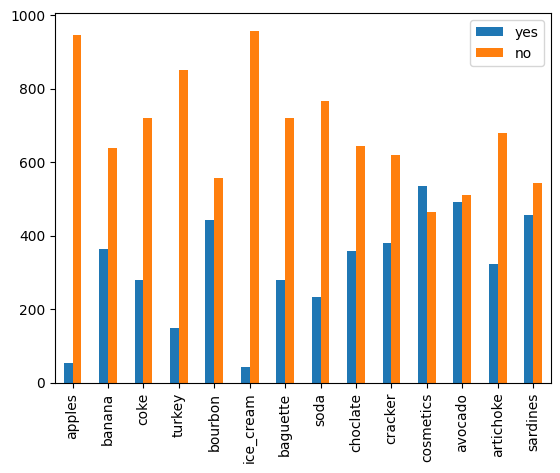

In [81]:
# Investigate the dataset in more depth
ax = purchased.plot.bar()
plt.show()

In [82]:
Rules = list(apriori(transactions,min_support=0.1,  min_confidence=0.95))
associationRules = ARutils.extract(Rules,'cosmetics',2)
ARutils.inspect(associationRules)

The number of associated rules: 0


In [83]:
Rules = list(apriori(transactions,min_support=0.1,  min_confidence=0.5))
associationRules = ARutils.extract(Rules,'cosmetics',2)
ARutils.inspect(associationRules)

The number of associated rules: 24
LHS: ['artichoke'] --> RHS:['cosmetics'], support: 0.17, confidence: 0.52, lift: 0.97
--------------------------------------------------------------------------------
LHS: ['avocado'] --> RHS:['cosmetics'], support: 0.36, confidence: 0.73, lift: 1.36
--------------------------------------------------------------------------------
LHS: ['banana'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.53, lift: 0.99
--------------------------------------------------------------------------------
LHS: ['bourbon'] --> RHS:['cosmetics'], support: 0.23, confidence: 0.52, lift: 0.98
--------------------------------------------------------------------------------
LHS: ['choclate'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.54, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['coke'] --> RHS:['cosmetics'], support: 0.14, confidence: 0.51, lift: 0.95
---------------------------------------------------------

In [84]:
import plotly.express as px

In [85]:
rules_df = pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
fig = px.scatter(rules_df, x = 'Support', y="Confidence",color="Lift", hover_data=['LHS','RHS'], color_continuous_scale="agsunset")

fig.show()

In [86]:
Rules = list(apriori(transactions, min_support = 0.02, min_confidence=0.2, max_length=3))
associationRules = ARutils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns=['LHS','RHS','Support','Confidence','Lift'])

# Use lambda function for partial string match

rules_df[rules_df['RHS'].apply(lambda x: 'avocado' in x)]

,LHS,RHS,Support,Confidence,Lift
1,[],[avocado],0.490,0.490000,1.000000
11,[apples],[avocado],0.030,0.555556,1.133787
22,[artichoke],[avocado],0.158,0.490683,1.001394
45,[baguette],[avocado],0.141,0.505376,1.031380
47,[banana],[avocado],0.178,0.490358,1.000731
...,...,...,...,...,...
584,"[sardines, soda]",[avocado],0.063,0.484615,0.989011
585,[turkey],"[sardines, avocado]",0.037,0.248322,1.093930
587,"[sardines, turkey]",[avocado],0.037,0.474359,0.968080
588,[turkey],"[avocado, soda]",0.030,0.201342,1.735709


In [87]:
avocado_rules = rules_df[rules_df['RHS'].apply(lambda x: 'avocado' in x)].sort_values(by=['Lift'], ascending=False)
avocado_rules.head()

,LHS,RHS,Support,Confidence,Lift
548,[coke],"[turkey, avocado]",0.068,0.242857,3.571429
549,[turkey],"[coke, avocado]",0.068,0.456376,3.405790
168,[apples],"[choclate, avocado]",0.023,0.425926,2.353182
517,[cracker],"[choclate, avocado]",0.158,0.414698,2.291150
516,[choclate],"[cracker, avocado]",0.158,0.442577,2.201876


In [88]:
fig = px.scatter(avocado_rules, x = 'Support', y='Confidence', color="Lift", hover_data=['LHS','RHS'], color_continuous_scale="agsunset")
fig.show()